In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings; warnings.simplefilter('ignore')

In [2]:
# set print options for pandas
# pandas and numpy display options
pd.options.mode.chained_assignment = None
pd.options.display.max_rows=200
pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 20

In [3]:
# Load dataset
data = pd.read_csv('carInsurance_train.csv', encoding='utf-8')

#### Take a quick peek at the data. There is no substitute for looking at the raw data. Looking at the raw data can reveal insights that are not poosible by any other way. 

In [4]:
data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


### Check if any columns have NaN values

In [69]:
data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [74]:
data['Job'].value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64

### What is the type of each attribute?

It is important to know data type of each attribute. Conversions may be required for representing string as floating point values or integers to represent categorical or ordinal values.

In [5]:
print(data.dtypes)

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object


### Dimensions of data

It is good to know dimensions of data, both in terms of rows and columns. Too many instances can make it slower for algorithm to train. Too few instances may not be sufficient for an algorithm to learn from data. Too many features may add noise or may result into highly dimensional data and cause curse of dimensionality.

In [6]:
print(data.shape)

(4000, 19)


In [7]:
data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


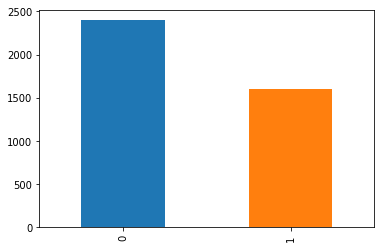

In [18]:
data['CarInsurance'].value_counts().plot.bar()

In [9]:
data.corr(method='pearson')

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
Id,1.000000,0.000999,0.003334,-0.006639,0.004419,-0.003026,-0.017358,0.008898,0.014355,0.012662,-0.017864
Age,0.000999,1.000000,0.003720,0.094330,-0.183861,-0.012383,0.013762,0.028561,-0.016685,-0.002503,0.039158
Default,0.003334,0.003720,1.000000,-0.054045,-0.014974,0.124936,0.027350,0.029884,-0.033388,-0.031812,-0.039506
Balance,-0.006639,0.094330,-0.054045,1.000000,-0.072401,-0.081684,0.015519,-0.005201,-0.002107,0.001323,0.041561
HHInsurance,0.004419,-0.183861,-0.014974,-0.072401,1.000000,0.088145,-0.024075,-0.005858,0.081246,0.026900,-0.203419
CarLoan,-0.003026,-0.012383,0.124936,-0.081684,0.088145,1.000000,0.011299,0.020652,-0.041678,-0.020796,-0.092131
LastContactDay,-0.017358,0.013762,0.027350,0.015519,-0.024075,0.011299,1.000000,0.144303,-0.073521,-0.072977,-0.061271
NoOfContacts,0.008898,0.028561,0.029884,-0.005201,-0.005858,0.020652,0.144303,1.000000,-0.100634,-0.056527,-0.114884
DaysPassed,0.014355,-0.016685,-0.033388,-0.002107,0.081246,-0.041678,-0.073521,-0.100634,1.000000,0.496507,0.138943
PrevAttempts,0.012662,-0.002503,-0.031812,0.001323,0.026900,-0.020796,-0.072977,-0.056527,0.496507,1.000000,0.148763


In [8]:
data.skew()

Id                0.000000
Age               0.763293
Default           8.125869
Balance           9.877895
HHInsurance       0.029014
CarLoan           2.162338
LastContactDay    0.091053
NoOfContacts      5.241314
DaysPassed        2.536872
PrevAttempts      8.932735
CarInsurance      0.404150
dtype: float64

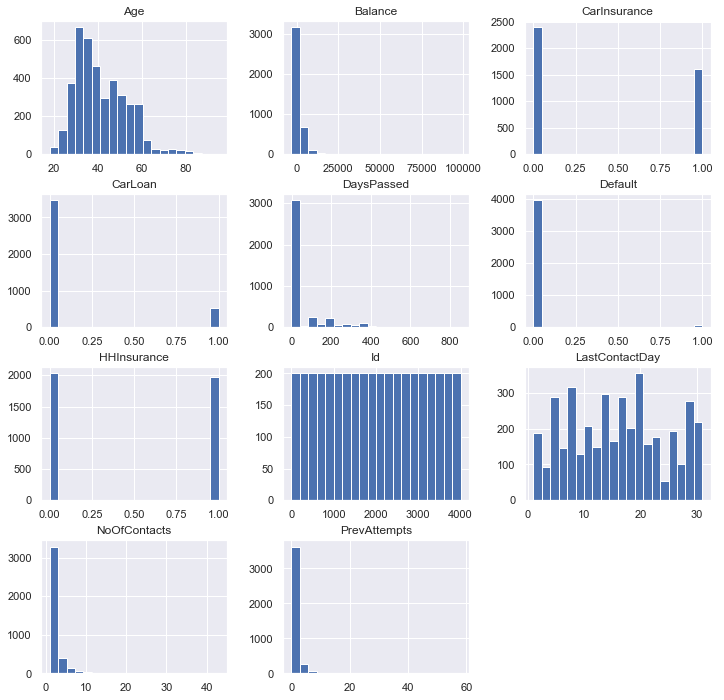

In [33]:
_ = data.hist(figsize=(12,12), bins=20)

### Look for outliers

In [40]:
sns.set(rc={'figure.figsize':(8,2)})
sns.set(style='darkgrid')

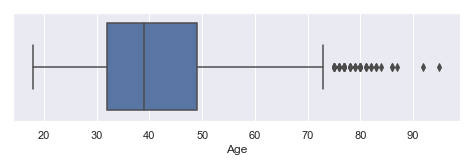

In [41]:
_ = sns.boxplot(data['Age'])

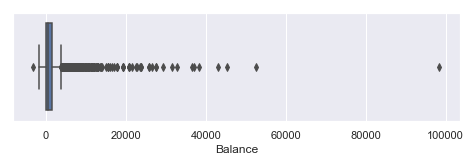

In [42]:
sns.boxplot(data['Balance'])

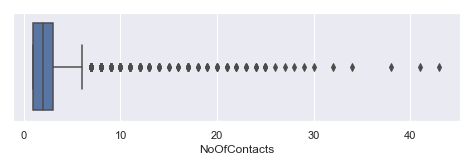

In [45]:
sns.boxplot(data['NoOfContacts'])

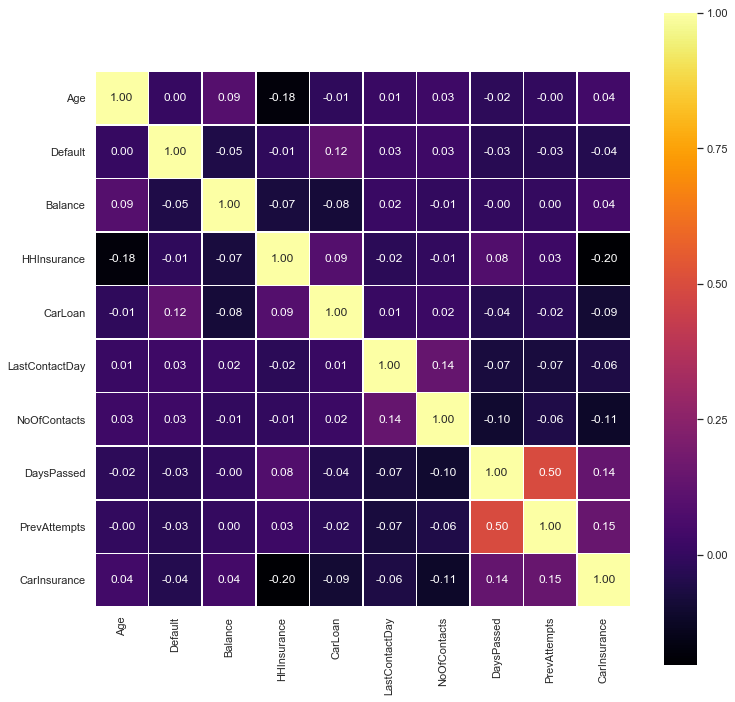

In [54]:
data_corr = data[['Age','Default','Balance','HHInsurance','CarLoan','LastContactDay','NoOfContacts','DaysPassed',
                  'PrevAttempts','CarInsurance']].corr()
plt.subplots(figsize=(12,12))
ax = sns.heatmap(data_corr, annot=True, fmt='.2f', square=True, linewidths=.5, cmap='inferno')